In [1]:
from glycowork.motif.draw import GlycoDraw

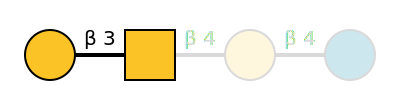

In [24]:
GlycoDraw("Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc", highlight_motif = "Gal(b1-3)GalNAc")


In [27]:
from glycowork.motif.graph import  glycan_to_nxGraph

In [29]:
import pandas as pd

In [39]:
flex_data_path = '/data/glycan_graphs.pkl'

def load_data():
    """Load glycan flexibility data and binding data."""
    with open(flex_data_path, 'rb') as file:
        flex_data = pickle.load(file)
    # binding_df = pd.read_csv(flex_data_path)
    return flex_data

In [45]:
import pickle
import networkx as nx

In [40]:
glycan_graphs =load_data()

In [56]:
list(glycan_graphs['Fuc(a1-2)Gal(b1-3)GlcNAc'].nodes)

[3, 2, 1, 4]

In [43]:
luc_graph = glycan_graphs['Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc'].copy()

In [78]:
mygraph = glycan_to_nxGraph('Rha(a1-3)Rha(a1-2)Gal')
oldgraph = glycan_graphs['Rha(a1-3)Rha(a1-2)Gal']
if len(mygraph.nodes)%2 ==1:
    new_max = len(mygraph.nodes)
    old_max = len(oldgraph.nodes)
    map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))
else:
    new_max = len(mygraph.nodes)-1
    old_max = len(oldgraph.nodes)
    map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))


In [81]:
dict(zip(range(0, new_max, 2),range(old_max,0,-1)))

{0: 4, 2: 3, 4: 2}

In [82]:
def get_daniel_to_luc_graph_map(daniel_graph, luc_graph):
    if len(daniel_graph.nodes)%2 ==1:
        new_max = len(daniel_graph.nodes)
        old_max = len(luc_graph.nodes)
        map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))
    else:
        new_max = len(daniel_graph.nodes)-1
        old_max = len(luc_graph.nodes)
        map_dict = dict(zip(range(0, new_max, 2),range(old_max,0,-1)))
    return map_dict

In [94]:
d_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-3)GlcNAc')
luc_graph = glycan_graphs['Fuc(a1-2)Gal(b1-3)GlcNAc']
g_map = get_daniel_to_luc_graph_map(d_graph, luc_graph)
g_map

{0: 4, 2: 3, 4: 2}

In [106]:
daniel_selected_nodes = [0, 2, 4]
luc_selected_nodes = []
for node in daniel_selected_nodes:
    if node in g_map:
        luc_selected_nodes.append(g_map[node])
luc_selected_nodes

[4, 3, 2]

In [93]:
luc_graph.nodes[g_map[0]]

{'Monosaccharide': 'Fuc(a1-2)',
 'Mean Score': 2.1199890089725764,
 'Median Score': 2.1202326342463493,
 'Weighted Score': 2.12907997324471,
 'weighted_mean_flexibility': 0.6843510982235121}

In [114]:
## alternative mapping func
#d_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-3)GlcNAc')
#luc_graph = glycan_graphs['Fuc(a1-2)Gal(b1-3)GlcNAc']
d_graph =glycan_to_nxGraph('Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc')
luc_graph = glycan_graphs['Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc']

def create_mapping(daniel_graph, luc_graph):
    node_count_daniel = len(daniel_graph.nodes)
    node_count_luc = len(luc_graph.nodes)
    if node_count_daniel % 2 == 1:
        max_index = node_count_daniel
    else:
        max_index = node_count_daniel - 1
    return dict(zip(range(0, max_index, 2), range(node_count_luc, 0, -1)))

mapping = create_mapping(d_graph, luc_graph)
mapping


{0: 8, 2: 7, 4: 6, 6: 5, 8: 4, 10: 3, 12: 2}

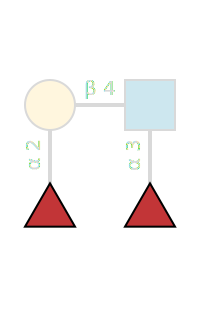

In [116]:
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc", highlight_motif="Fuc")

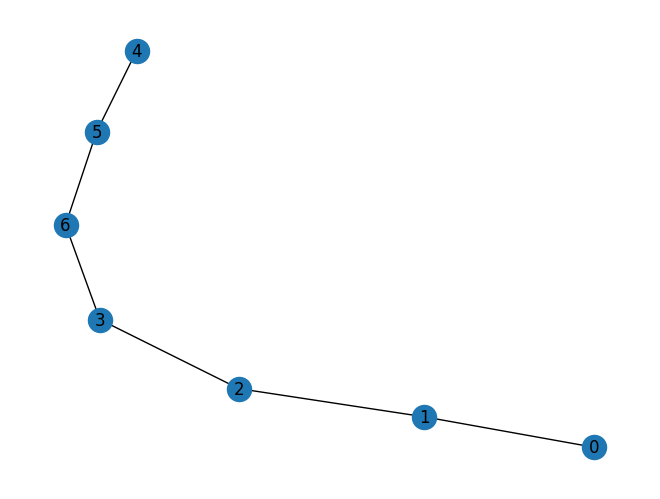

In [119]:
daniel_graph = glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc')
nx.draw(daniel_graph, with_labels=True)

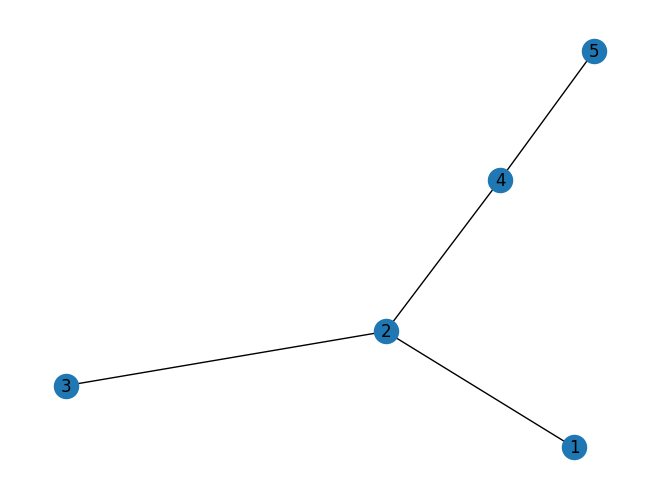

In [118]:
nx.draw(glycan_graphs['Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc'], with_labels=True)


In [111]:
luc_graph.__dict__

{'graph': {},
 '_node': {3: {'Monosaccharide': 'Gal(b1-3)',
   'Mean Score': 2.0702558295646063,
   'Median Score': 2.1024119952926412,
   'Weighted Score': 2.092785973050695,
   'weighted_mean_flexibility': 0.36258494150584986},
  2: {'Monosaccharide': 'GlcNAc(b1-1)',
   'Mean Score': 2.538361548252093,
   'Median Score': 2.5042925303569064,
   'Weighted Score': 2.5166298042982795,
   'weighted_mean_flexibility': 0.5460559610705573},
  1: {'Monosaccharide': '-R',
   'Mean Score': 0.46005027492841083,
   'Median Score': 0.4585103988647461,
   'Weighted Score': 0.46351294226347717,
   'weighted_mean_flexibility': 0.8475338132853361},
  4: {'Monosaccharide': 'Fuc(a1-2)',
   'Mean Score': 2.1199890089725764,
   'Median Score': 2.1202326342463493,
   'Weighted Score': 2.12907997324471,
   'weighted_mean_flexibility': 0.6843510982235121}},
 '_adj': {3: {2: {}, 4: {}}, 2: {3: {}, 1: {}}, 1: {2: {}}, 4: {3: {}}},
 'nodes': NodeView((3, 2, 1, 4)),
 'degree': DegreeView({3: 2, 2: 2, 1: 1, 4: 1}

In [95]:
luc_graph.nodes[]

SyntaxError: invalid syntax (3242455246.py, line 1)

In [96]:

map_dict

{0: 4, 2: 3, 4: 2}

In [75]:
map_dict

{0: 5, 2: 4, 4: 3, 6: 2}

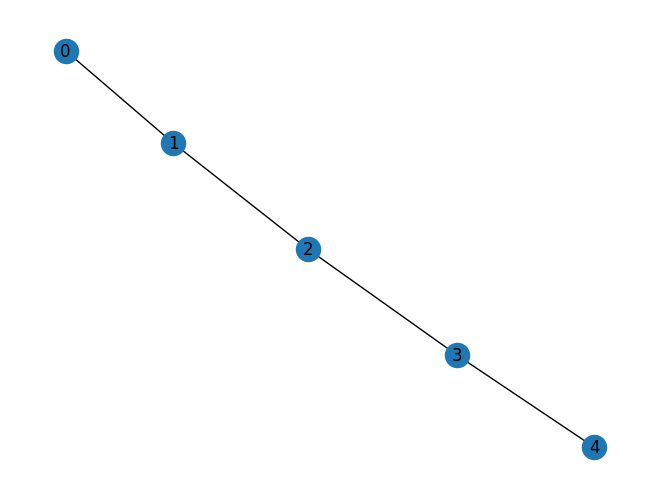

In [97]:
daniel_graph = glycan_to_nxGraph('Rha(a1-3)Rha(a1-2)Gal')
nx.draw(daniel_graph, with_labels=True)

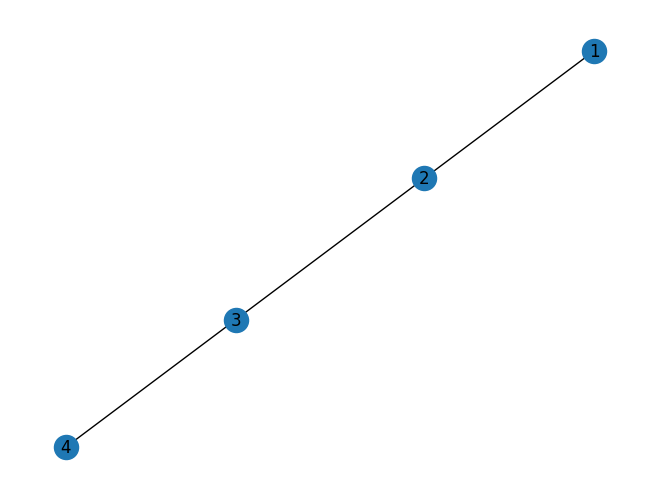

In [99]:
nx.draw(glycan_graphs['Rha(a1-3)Rha(a1-2)Gal'], with_labels=True)

In [62]:
map_dic

{0: 1, 2: 3, 4: 5, 6: 7}

In [28]:
daniel_graph = glycan_to_nxGraph('Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc')

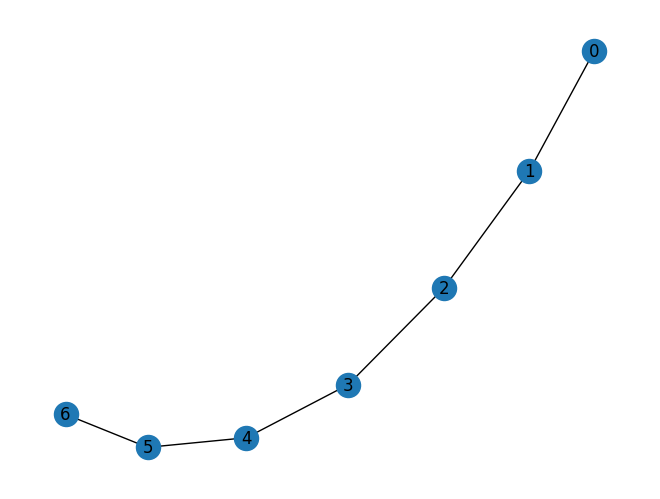

In [54]:
nx.draw(daniel_graph, with_labels=True)

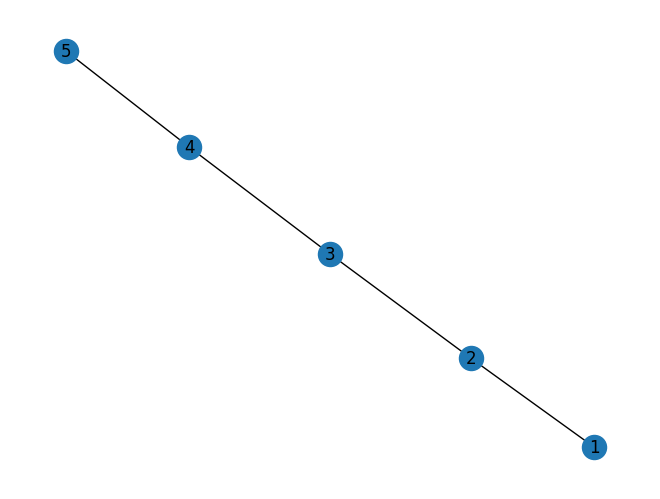

In [55]:
nx.draw(luc_graph, with_labels=True)

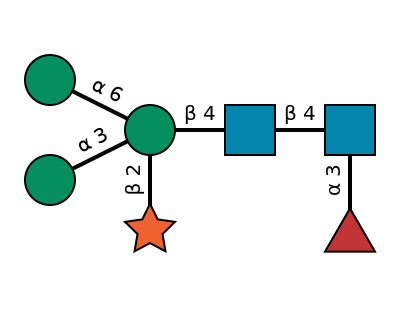

In [6]:
GlycoDraw("Man(a1-3)[Xyl(b1-2)][Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc")

True


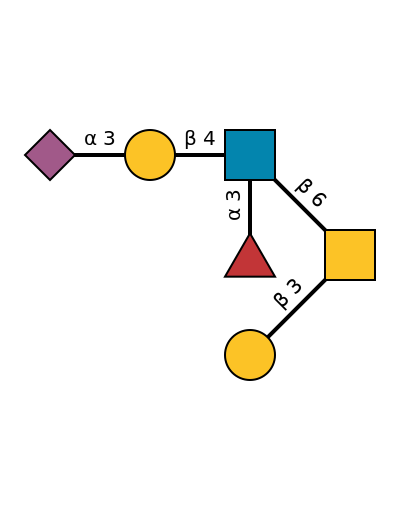

In [18]:
from glycowork.motif.graph import subgraph_isomorphism, glycan_to_nxGraph

print(subgraph_isomorphism('Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
                     'Fuc(a1-?)[Gal(b1-?)]GlcNAc', termini_list = ['terminal']))


GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc")


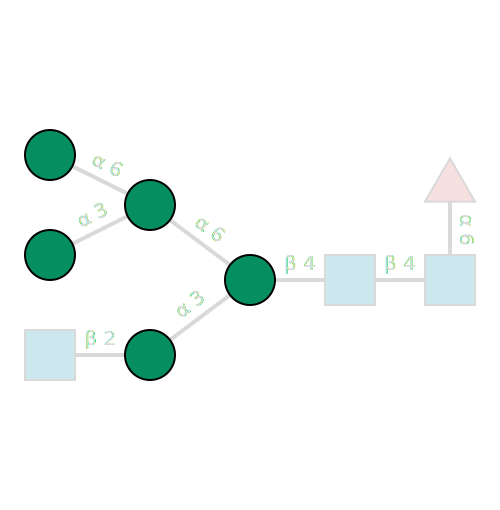

In [101]:
GlycoDraw("GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif="Man")

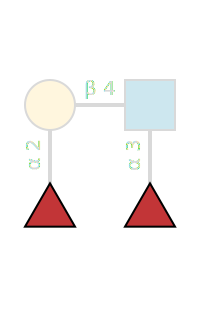

In [102]:
GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc", highlight_motif="Fuc")

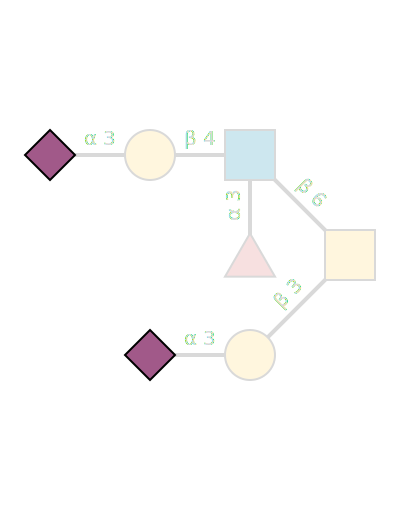

In [103]:
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc", highlight_motif="Neu5Ac")

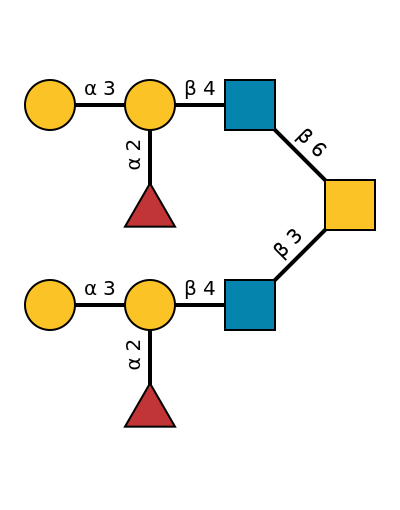

In [104]:
GlycoDraw("Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-3)[Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)]GalNAc")